In [242]:
import  pandas as pd
import  numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colormaps
import koreanize_matplotlib
import aspose.pdf as pdf
import tabula
import os

In [243]:
result = {
    
}

# 데이터에는 실근무자 뿐만 아니라 현재 근무하지 않는 퇴직자가 포함되어 있음
# 필요한 데이터를 파일명에 맞게 한번에 로딩 진행
for file in os.listdir('data'):
    result[file.split('.')[0]] = pd.read_excel(f'data/{file}', index_col=[0,1], header=[0,1])
datalist = list(result.keys())
mergeddf = result[datalist[0]]

for i, df in enumerate(datalist[1:]):
    mergeddf = pd.merge(mergeddf, result[df], how='inner', left_index=True, right_index=True, suffixes=(f"_{i}x", f"_{i}y"))

mergeddf

C:\Users\Administrator\PycharmProjects\PublicDataProject\.venv\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\Administrator\PycharmProjects\PublicDataProject\.venv\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\Administrator\PycharmProjects\PublicDataProject\.venv\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\Administrator\PycharmProjects\PublicDataProject\.venv\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains n

산업중분류별(2)                           2022_1x                                  \
산업중분류별(2)                                 계    떨어짐    넘어짐   부딪힘 물체에 맞음  무너짐   
총계              소계                   130348  14387  25084  9283   8252  466   
광업              소계                     3873     28     20    17     20    9   
                석탄광업 및 채석업             3425      4      1     1      4    2   
                석회석·금속·비금속광업 및 기타광업     448     24     19    16     16    7   
제조업             소계                    31554   2192   3368  2327   2245   75   
                식료품제조업                 3344    192    715   186    137    8   
                섬유 및 섬유제품 제조업          1167    107    162    71     43    0   
                목재 및 종이제품 제조업          1556    120    148   117    119   11   
                출판·인쇄·제본업               420     27     51    28     21    1   
                화학 및 고무제품 제조업          3363    237    313   240    166    9   
                의약품·화장품·연탄·석유제품제조업      379     14     46    18     15    1   
                기계기구·금속·비금속광물제품제조업    14616   1000   1248  1256   1338   37   
                금속제련업                   302     15     31    14      6    0   
                전기기계기구·정밀기구·전자제품제조업    1941    122    272   139    149    4   
                선박건조 및 수리업             3336    193    253   191    151    0   
                수제품 및 기타제품 제조업         1130    165    129    67    100    4   
전기·가스·증기 및 수도사업 소계                      129      9     22     9      6    0   
                전기·가스·증기 및 수도사업         129      9     22     9      6    0   
건설업             소계                    31245   7912   4990  2731   3371  285   
                건설업                   31245   7912   4990  2731   3371  285   
운수·창고 및 통신업     소계                    12468    800   2054   684    335   26   
                철도·항공·창고·운수관련서비스업      3157    357    618   449    228   18   
                육상 및 수상운수업             9063    409   1386   227    104    7   
                통신업                     248     34     50     8      3    1   
임업              소계                      968     28    148   115    174    0   
                임업                      968     28    148   115    174    0   
어업              소계                       59      9     11     5      8    0   
                어업                       59      9     11     5      8    0   
농업              소계                      682    174    128    47     32    1   
                농업                      682    174    128    47     32    1   
금융 및 보험업        소계                      666     27    183    21      5    0   
                금융 및 보험업                666     27    183    21      5    0   
기타의 사업          소계                    48704   3208  14160  3327   2056   70   
                시설관리및사업지원서비스업          9701   1081   3613   757    369   18   
                해외파견자                    29      1      3     1      2    0   
                전문·보건·교육·여가관련서비스업     10318    451   3232   753    460   11   
                도소매·음식·숙박업            21325   1112   5257  1289    826   38   
                부동산업 및 임대업              304     37     83    23     25    0   
                국가 및 지방자치단체의 사업        5191    279   1549   387    271    2   
                주한미군                     51      2     12     6      3    0   
                기타의 각종사업               1785    245    411   111    100    1   

산업중분류별(2)                                                       ... 2022_3x  \
산업중분류별(2)                               끼임 절단·베임·찔림   감전 폭발·파열  ...    분류불능   
총계              소계                   13368    10514  320   269  ...      23   
광업              소계                      24        2    0     0  ...      10   
                석탄광업 및 채석업               4        0    0     0  ...       9   
                석회석·금속·비금속광업 및 기타광업     20        2    0     0  ...       1   
제조업             소계                    7199     2466   77   133  ...       8   
                식료품제조업                 825      5

In [244]:
for key, value in result.items():
    result[key] = value[value.index.get_level_values(1).str.find("소계") < 0]

for key, value in result.items():
    result[key] = value[value.index.get_level_values(1).str.find("주한미군") < 0]

for key, value in result.items():
    result[key] = value[value.index.get_level_values(1).str.find("해외파견자") < 0]

print()



['']

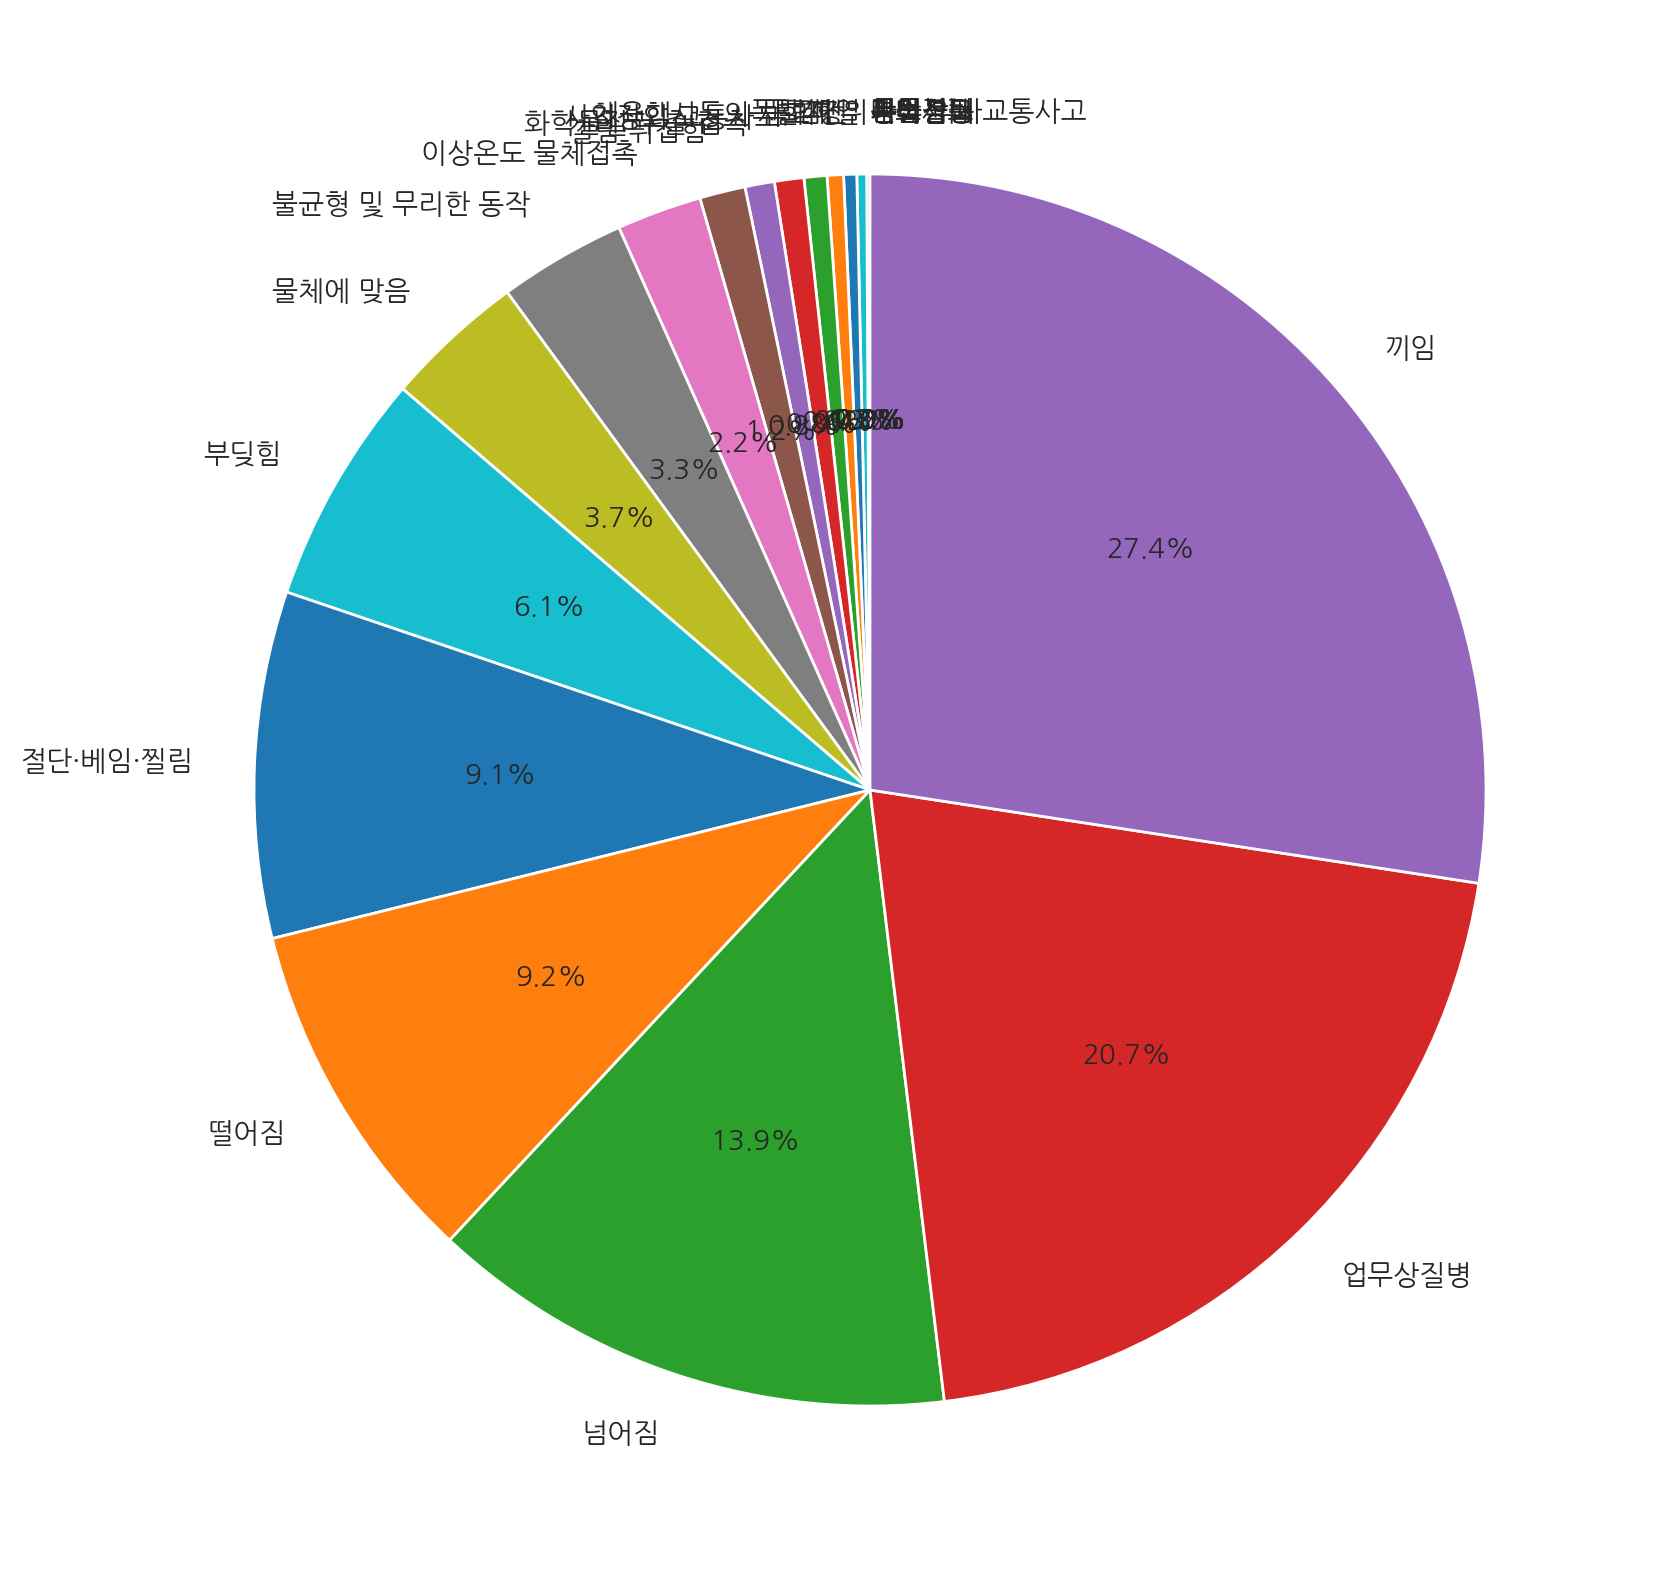

In [245]:
testpie = result['전체_재해_현황_및_분석발생형태별_산업별_중분류__20240129203853'].iloc[3,1:]
testpie.sort_values(ascending=True,inplace=True)
sns.color_palette("pastel", as_cmap=True)
plt.figure(figsize=(10,10), dpi=200)
plt.pie(testpie, labels=[x[1] for x in testpie.index], autopct='%1.1f%%',startangle=90)
plt.get_figlabels()




In [246]:
# 해당 데이터에 대한 코드 값이 존제함 이를 로딩해볼수도 있음 
codelist = pd.read_excel('첨부1_4대보험공제내역_2022년_최종.xlsx', sheet_name=1, header=[0], skiprows=[0,1], usecols=[0,1,2])
codelist.columns = ['코드네임', '업종이름', '2022 요율']
codelist.drop([0], inplace=True)
codelist[codelist.columns[::2]] = codelist[codelist.columns[::2]].astype(np.uint32)
# codelist.set_index()
# 
for df in result.values():
    df.loc[:,'2022 요율'] = 0
    print(df.index.get_level_values(1))
    for idx, name in enumerate(df.index.get_level_values(1)):
        tmp_result = codelist[codelist['업종이름'].str.find(name[:2]) == 0]
        # print(tmp_result['코드네임'].values[0])
        if len(tmp_result.index) == 1:
            df.iloc[idx,-1] = tmp_result['2022 요율'].values[0]
        elif name.find("수도사업") > 0:
            df.iloc[idx,-1] = tmp_result[tmp_result['업종이름'].str.find("수도사업") > 0]['2022 요율'].values[0]
        elif name.find("전자제품") > 0:
            df.iloc[idx,-1] = tmp_result[tmp_result['업종이름'].str.find("전자제품") > 0]['2022 요율'].values[0]
        
    

codelistOrdered = result[list(result.keys())[-1]]['2022 요율'].copy()

Index(['석탄광업 및 채석업', '석회석·금속·비금속광업 및 기타광업', '식료품제조업', '섬유 및 섬유제품 제조업',
       '목재 및 종이제품 제조업', '출판·인쇄·제본업', '화학 및 고무제품 제조업', '의약품·화장품·연탄·석유제품제조업',
       '기계기구·금속·비금속광물제품제조업', '금속제련업', '전기기계기구·정밀기구·전자제품제조업', '선박건조 및 수리업',
       '수제품 및 기타제품 제조업', '전기·가스·증기 및 수도사업', '건설업', '철도·항공·창고·운수관련서비스업',
       '육상 및 수상운수업', '통신업', '임업', '어업', '농업', '금융 및 보험업', '시설관리및사업지원서비스업',
       '전문·보건·교육·여가관련서비스업', '도소매·음식·숙박업', '부동산업 및 임대업', '국가 및 지방자치단체의 사업',
       '기타의 각종사업'],
      dtype='object')
Index(['석탄광업 및 채석업', '석회석·금속·비금속광업 및 기타광업', '식료품제조업', '섬유 및 섬유제품 제조업',
       '목재 및 종이제품 제조업', '출판·인쇄·제본업', '화학 및 고무제품 제조업', '의약품·화장품·연탄·석유제품제조업',
       '기계기구·금속·비금속광물제품제조업', '금속제련업', '전기기계기구·정밀기구·전자제품제조업', '선박건조 및 수리업',
       '수제품 및 기타제품 제조업', '전기·가스·증기 및 수도사업', '건설업', '철도·항공·창고·운수관련서비스업',
       '육상 및 수상운수업', '통신업', '임업', '어업', '농업', '금융 및 보험업', '시설관리및사업지원서비스업',
       '전문·보건·교육·여가관련서비스업', '도소매·음식·숙박업', '부동산업 및 임대업', '국가 및 지방자치단체의 사업',
       '기타의 각종사업'],
      dtype='object')
Index(['석탄광업 및 채석업', '석회석·금속

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2264\2650236867.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'2022 요율'] = 0


In [247]:
for df in result.values():
    cols = [x[-1] if len(x[-1]) > 1 else x[0] for x in df.columns]
    df.columns = cols


C:\Users\Administrator\AppData\Local\Temp\ipykernel_2264\1625550024.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bar.set_xticklabels(bar.get_xticklabels(), rotation=90)


Text(0.5, 1.0, '업종별 2022 요율')

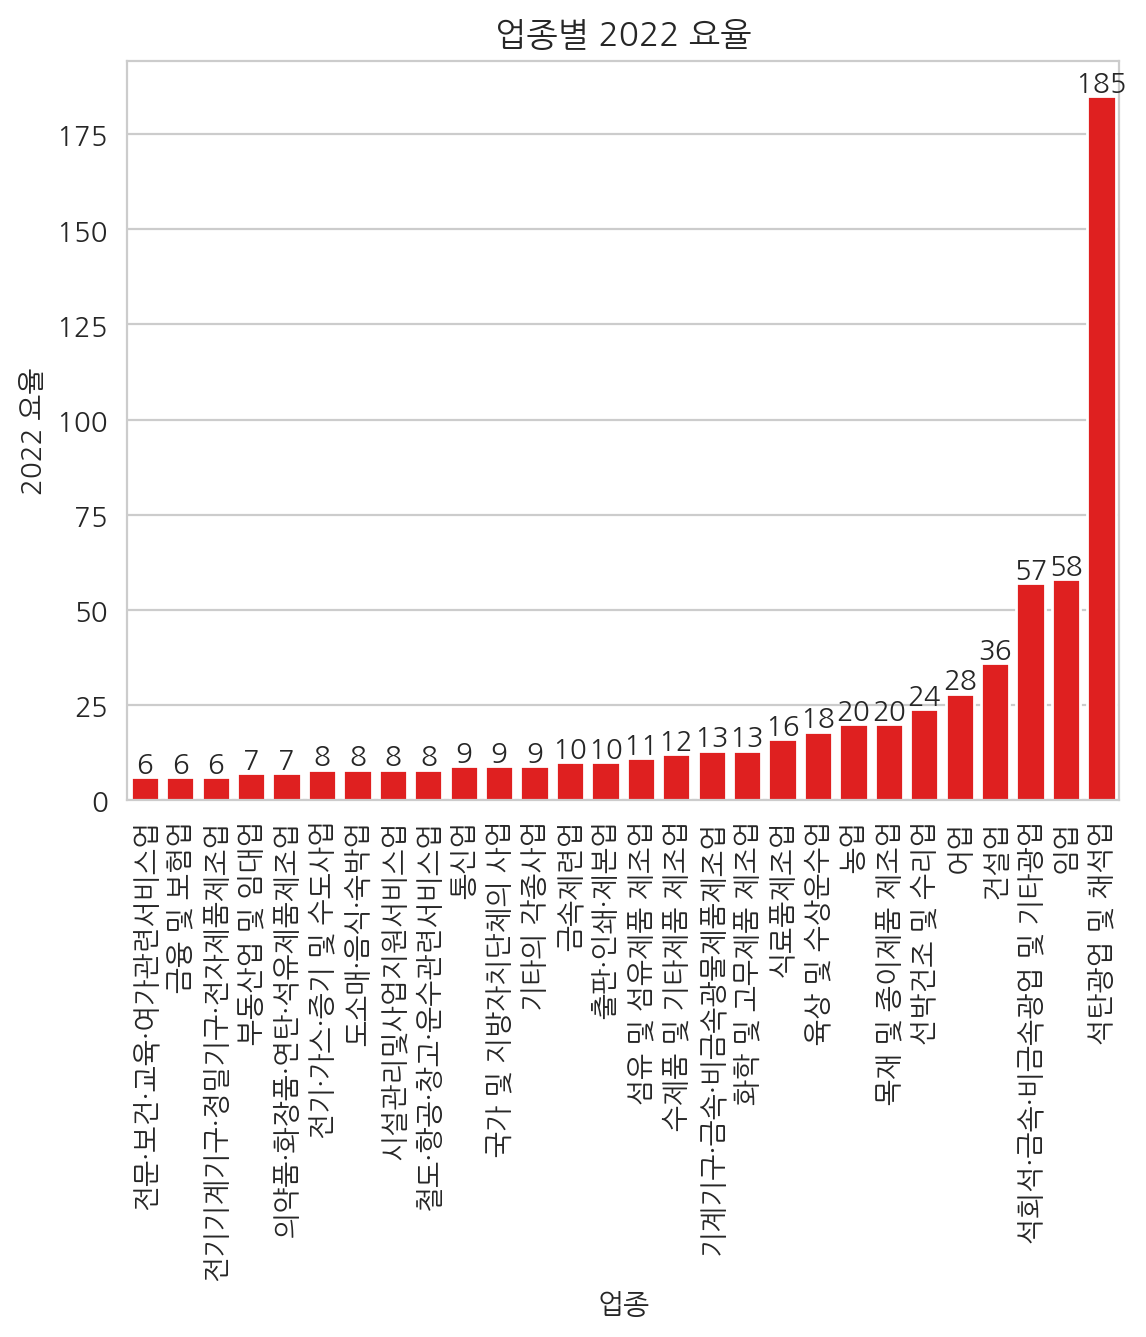

In [248]:
target = result[list(result.keys())[1]]
target = target.sort_values(by = target.columns[-1])

plt.figure(dpi=200)
bar = sns.barplot(data=target.sort_values(by = target.columns[-1]), x=target.index.get_level_values(1), y=target.columns[-1], color="red")
bar.set_xticklabels(bar.get_xticklabels(), rotation=90)
bar.bar_label(bar.containers[0])
bar.set_xlabel("업종")
bar.set_title("업종별 " + target.columns[-1])

In [249]:
resultas1 = {}

for name, data in result.items():
    resultas1[name] = data.apply(lambda x : pd.to_numeric(x, errors='raise') / data[data.columns[0]] * 100)


In [250]:
# 해당 통계 데이터는 사람 인원 변수를 제거한 후 출력한 차트입니다.

mywork = resultas1[list(resultas1.keys())[0]]


# plt.figure(dpi=200, figsize=(10,10))
topcriteria = 7
for idx ,colname in enumerate(mywork.columns[1:]):
    # plt.subplot(4,4,idx+1)
    plt.figure(dpi=300, figsize=(10,6))
    chartdata = (mywork.sort_values(by=colname, ascending=False).iloc[:topcriteria, idx + 1])
    otherdata = (mywork.sort_values(by=colname, ascending=False).iloc[topcriteria:, idx + 1].sum())
    label_for_chart = ([x[1] for x in chartdata.index]) + ['기타']
    # print(chartdata.name)
    if chartdata.name not in ["광산사고"]:
        patches, texts, autotexts = plt.pie(
            chartdata.tolist() + [otherdata], 
            # labels = label_for_chart, 
            autopct='%1.1f%%', 
            colors=sns.color_palette('pastel'), 
            startangle=90, 
            textprops={'fontsize': 15}, 
            pctdistance=0.8
        )
        plt.title(chartdata.name + " (비율기반)", fontsize=22, fontweight = 'bold')
        # plt.bar_label(chartdata.iloc[:topcriteria])
        plt.legend(
            patches, 
            label_for_chart,
            bbox_to_anchor=(1,1),
        )
        # plt.bar_label(chartdata.iloc[:topcriteria])
        plt.tight_layout()
        plt.savefig(f"nopeopleimg/{chartdata.name}_사람변수X.png")
        plt.close()
        # plt.show()
    


<Figure size 3000x1800 with 0 Axes>

In [251]:
# 해당 통계 데이터는 사람 인원 변수를 포함 후 출력한 차트입니다.

myworkwithpeople = result[list(result.keys())[0]]


# plt.figure(dpi=200, figsize=(10,6))
topcriteria = 7
for idx ,colname in enumerate(myworkwithpeople.columns[1:]):
    # plt.subplot(4,4,idx+1)
    plt.figure(dpi=300, figsize=(10,6))
    chartdata = (myworkwithpeople.sort_values(by=colname, ascending=False).iloc[:topcriteria, idx + 1])
    otherdata = (myworkwithpeople.sort_values(by=colname, ascending=False).iloc[topcriteria:, idx + 1].sum())
    label_for_chart = (([x[1] for x in chartdata.index]) + ['기타']) # if chartdata.name.find("어업") < 0 else (["어업"])
    if chartdata.name not in ["광산사고"]:
        patches, texts, autotexts = plt.pie(
            chartdata.tolist() + [otherdata], 
            # labels = label_for_chart, 
            autopct='%1.1f%%', 
            colors=sns.color_palette('pastel'), 
            startangle=90, 
            textprops={'fontsize': 15}, 
            pctdistance=0.8
        )
        plt.title(chartdata.name + " (인원수 기반)", fontsize=22, fontweight = 'bold')
        # plt.bar_label(chartdata.iloc[:topcriteria])
        plt.legend(
            patches, 
            label_for_chart,
            bbox_to_anchor=(1,1),
        )
        plt.savefig(f"peopleimg/{chartdata.name}_사람변수ㅇ.png")
        plt.tight_layout()
        plt.close()
        # plt.show()
    


<Figure size 3000x1800 with 0 Axes>